In [14]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [15]:
import os
import sys
import utils
# import models
import torch
from tqdm import tqdm_notebook
from torch.utils.data import DataLoader
from torchvision import datasets
from gan import *
import torchvision.transforms as transforms
import torch.nn as nn

In [16]:
class arg_parser_subst():
    def __init__(self):
        self.n_epochs = 500 
        self.batch_size = 100
        self.batch_size_g = 100
        self.lr = 0.0002 
        self.b1 = 0.5 
        self.b2 = 0.999 
        self.n_cpu = 12 
        self.latent_dim = 100 
        self.img_size = 28
        self.img_shape = (1,28,28)
        self.channels = 1
        self.n_paths_G = 100 # number of generators
        self.classifier_para = 0.001
        self.classifier_para_g = 0.001
        self.logs_path='experiment'
        self.data_path='data'
        self.dataset='fmnist'
        self.architecture='cnn'
        self.logs_path='exp_ly_noisef'
        self.norm_d='layer_norm'
        self.init_noise=1.0
        self.noise_decay=0.01
        self.sample_interval=5
        self.no_conv_g = 2
        self.no_conv_d = 3
        self.lr_g = 0.0001
        self.lr_d = 0.0001
        self.lr_c = 0.0001
        
#--logs_path=experiment --n_paths_G=10 --data_path=data --dataset=fmnist\
#--architecture=cnn --logs_path=exp_ly_noisef --norm_d=layer_norm --init_noise=1.0 --noise_decay=0.01 --sample_interval=5

In [17]:
opt = arg_parser_subst()

In [ ]:
def main():
    # opt = utils.arg_parser_subst(sys.argv)
    ##opt = utils.parse_args()

    if opt.dataset == "fmnist":
        os.makedirs("data/fmnist", exist_ok=True)
        dataloader = torch.utils.data.DataLoader(
            datasets.FashionMNIST(
                "data/fmnist",
                train=True,
                download=True,
                transform=transforms.Compose(
                    [transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
                ),
            ),
            batch_size=opt.batch_size,
            shuffle=True,
        )
        if("cnn" in opt.architecture):
            import models_cnn_28 as models
        else:
            import models
        

    if opt.dataset == "mnist":
        os.makedirs("data/mnist", exist_ok=True)
        dataloader = torch.utils.data.DataLoader(
            datasets.MNIST(
                "data/mnist",
                train=True,
                download=True,
                transform=transforms.Compose(
                    [transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
                ),
            ),
            batch_size=opt.batch_size,
            shuffle=True,
        )
        if("cnn" in opt.architecture):
            import models_cnn_28 as models
        else:
            import models
        
        
    elif opt.dataset == "cifar10":
        os.makedirs("data/CIFAR10", exist_ok=True)
        dataloader = torch.utils.data.DataLoader(
            datasets.CIFAR10('data/CIFAR10', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize([.5],[.5])
                   ])
            ),
            batch_size=opt.batch_size, 
            shuffle=True)
        if("cnn" in opt.architecture):
            import models_cnn_32 as models
        else:
            import models

    generator = models.Generator(opt) #ok 
    discriminator = models.Discriminator(opt) # ok
    
    print("Generator: ", generator)
    print("Discriminator/classifier: ", discriminator)
    
    #optimizer G
    optimizer_G = torch.optim.Adam(generator.parameters(), lr=opt.lr_g, betas=(opt.b1, opt.b2))
    
    #optimizer D
    optimizer_D = torch.optim.Adam(list(discriminator.encoder_layers.parameters()) + list(discriminator.paths[0].parameters()), lr=opt.lr_d, betas=(opt.b1, opt.b2))
    # optimizer_D.add_param_group(discriminator.paths[0].parameters())
    
    #optimizer C
    optimizer_C = torch.optim.Adam(discriminator.paths[1].parameters(), lr=opt.lr_c, betas=(opt.b1, opt.b2))
    gan = Gan(generator, discriminator, optimizer_G, optimizer_D, optimizer_C, opt)

    gan.train(dataloader)

if __name__ == "__main__":
    main()

Generator:  Generator(
  (paths): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=100, out_features=12544, bias=True)
      (1): ReLU(inplace=True)
      (2): Reshape()
      (3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (4): ReLU(inplace=True)
      (5): ConvTranspose2d(128, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (6): Tanh()
    )
    (1): Sequential(
      (0): Linear(in_features=100, out_features=12544, bias=True)
      (1): ReLU(inplace=True)
      (2): Reshape()
      (3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (4): ReLU(inplace=True)
      (5): ConvTranspose2d(128, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (6): Tanh()
    )
    (2): Sequential(
      (0): Linear(in_features=100, out_features=12544, bias=True)
      (1): ReLU(inplace=True)
      (2): Reshape()
      (3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 

In [2]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [19]:
k = np.load("./exp_ly_noisef/plot/epoch15/nmi_scores.npy")
print(k)

[0.44046524 0.44029259 0.44019796 0.4389415  0.43898074 0.43316989
 0.4327794  0.424624   0.42281498 0.41876771 0.41710459 0.41715307
 0.4171559  0.41588602 0.40746564 0.40729244 0.40324077 0.39963805
 0.39729796 0.3966     0.39587267 0.39552405 0.39554016 0.39541208
 0.39516133 0.39447505 0.39414486 0.39398734 0.39215319 0.390295
 0.38650302 0.38485436 0.38405098 0.38312738 0.3821374  0.37838022
 0.37784379 0.37700275 0.37681841 0.37515175 0.37482526 0.37564944
 0.37457175 0.37404765 0.37075306 0.36573955 0.35658375 0.35637261
 0.35646461 0.35647741 0.35649675 0.34851381 0.34081503 0.34081073
 0.34048824 0.3363378  0.33812128 0.33485375 0.3323686  0.33090932
 0.32351367 0.31353454 0.30339174 0.29677279 0.2964327  0.28806679
 0.27553487 0.2660877  0.26371803 0.26118732 0.26118732 0.25581247
 0.24637409 0.23806198 0.23429629 0.23123617 0.2250651  0.21254075
 0.21249431 0.20229212 0.19883235 0.18543898 0.17582795 0.17459279
 0.16477245 0.15927641 0.14834212 0.14749512 0.1322234  0.129507

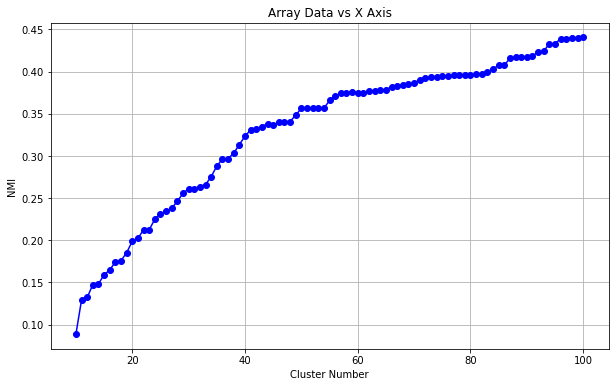

In [15]:
x_values = np.arange(100, 9, -1)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, k, marker='o', linestyle='-', color='b', label='Array Data')

# Add grid
plt.grid(True)

# Add labels and title
plt.xlabel('Cluster Number')
plt.ylabel('NMI')
plt.title('Array Data vs X Axis')
plt.savefig('NMI100.png', dpi=300)
# Show the plot
plt.show()

In [18]:
k = np.load("./exp_ly_noisef/plot/epoch15/acc_scores.npy")
print(k)

[0.18886667 0.18886667 0.18886667 0.18886667 0.18888333 0.18661667
 0.18698333 0.18423333 0.19235    0.19235    0.19235    0.19235
 0.19235    0.2009     0.2009     0.2009     0.2009     0.20091667
 0.20091667 0.20091667 0.20091667 0.20091667 0.2013     0.2013
 0.1958     0.1958     0.1958     0.19795    0.19795    0.20633333
 0.20646667 0.20646667 0.20706667 0.20798333 0.20798333 0.20798333
 0.20801667 0.20801667 0.20803333 0.20895    0.21248333 0.21296667
 0.2186     0.2186     0.2186     0.2186     0.21863333 0.21863333
 0.21883333 0.21883333 0.21883333 0.21883333 0.21073333 0.21073333
 0.21073333 0.21073333 0.21608333 0.21385    0.21385    0.21386667
 0.21388333 0.21421667 0.212      0.21016667 0.21016667 0.2102
 0.20071667 0.20071667 0.20073333 0.2046     0.2046     0.2046
 0.20343333 0.19953333 0.19953333 0.20168333 0.20168333 0.18758333
 0.18758333 0.18758333 0.18758333 0.18755    0.18755    0.18755
 0.17941667 0.18061667 0.17186667 0.17188333 0.16051667 0.15775
 0.13331667]


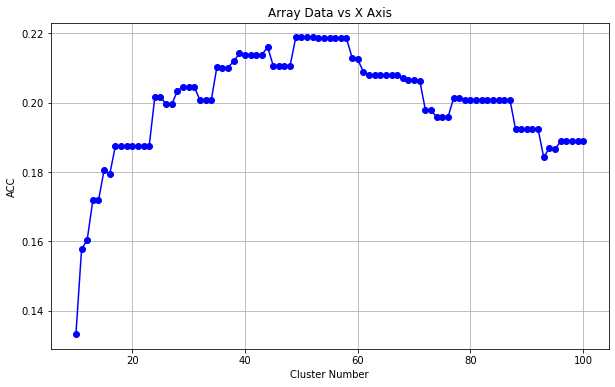

In [17]:
x_values = np.arange(100, 9, -1)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, k, marker='o', linestyle='-', color='b', label='Array Data')

# Add grid
plt.grid(True)

# Add labels and title
plt.xlabel('Cluster Number')
plt.ylabel('ACC')
plt.title('Array Data vs X Axis')
plt.savefig('acc100.png', dpi=300)
# Show the plot
plt.show()